In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor

import warnings

random_state=12345

warnings.simplefilter('ignore')

In [2]:
data_date = pd.read_csv('ethereum_2015-08-07_2024-06-28.csv',index_col=[0],parse_dates=[0])
data = pd.read_csv('ethereum_2015-08-07_2024-06-28.csv')

In [3]:
data_tendency = pd.DataFrame(data_date['Market Cap'])
data_tendency

,Market Cap
Start,
2024-06-27,4.116605e+11
2024-06-26,4.080268e+11
2024-06-25,4.075215e+11
2024-06-24,4.033384e+11
2024-06-23,4.220809e+11
...,...
2015-08-12,6.682610e+07
2015-08-11,4.768204e+07
2015-08-10,4.182758e+07


In [4]:
data.isna().sum()

Start         0
End           0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

In [5]:
data

,Start,End,Open,High,Low,Close,Volume,Market Cap
0,2024-06-27,2024-06-28,3383.529200,3481.170700,3379.164900,3458.848700,1.580400e+10,4.116605e+11
1,2024-06-26,2024-06-27,3405.188400,3432.360000,3347.860300,3381.250600,1.439138e+10,4.080268e+11
2,2024-06-25,2024-06-26,3361.433500,3430.000800,3345.159300,3408.774000,2.211726e+10,4.075215e+11
3,2024-06-24,2024-06-25,3441.330600,3451.157800,3262.511400,3363.763500,1.952047e+10,4.033384e+11
4,2024-06-23,2024-06-24,3523.068200,3544.824700,3443.023700,3443.023700,9.130649e+09,4.220809e+11
...,...,...,...,...,...,...,...,...
3242,2015-08-12,2015-08-13,1.067860,1.289940,0.883608,1.237670,1.971841e+06,6.682610e+07
3243,2015-08-11,2015-08-12,0.708448,1.131410,0.663235,1.057670,6.406322e+05,4.768204e+07
3244,2015-08-10,2015-08-11,0.701897,0.729854,0.636546,0.707703,4.577479e+05,4.182758e+07
3245,2015-08-09,2015-08-10,0.753325,0.879810,0.629191,0.729347,6.998264e+05,4.156260e+07


In [6]:
data['Start'] = pd.to_datetime(data['Start'])
data['End'] = pd.to_datetime(data['End'])

In [7]:
data_date_r_M = data_tendency.resample('1M').sum()

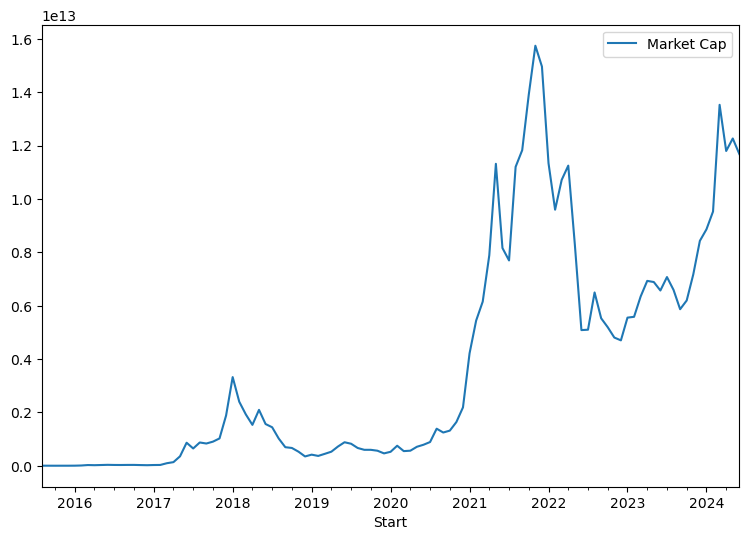

In [8]:
data_date_r_M.plot(figsize=(9,6))
plt.show()

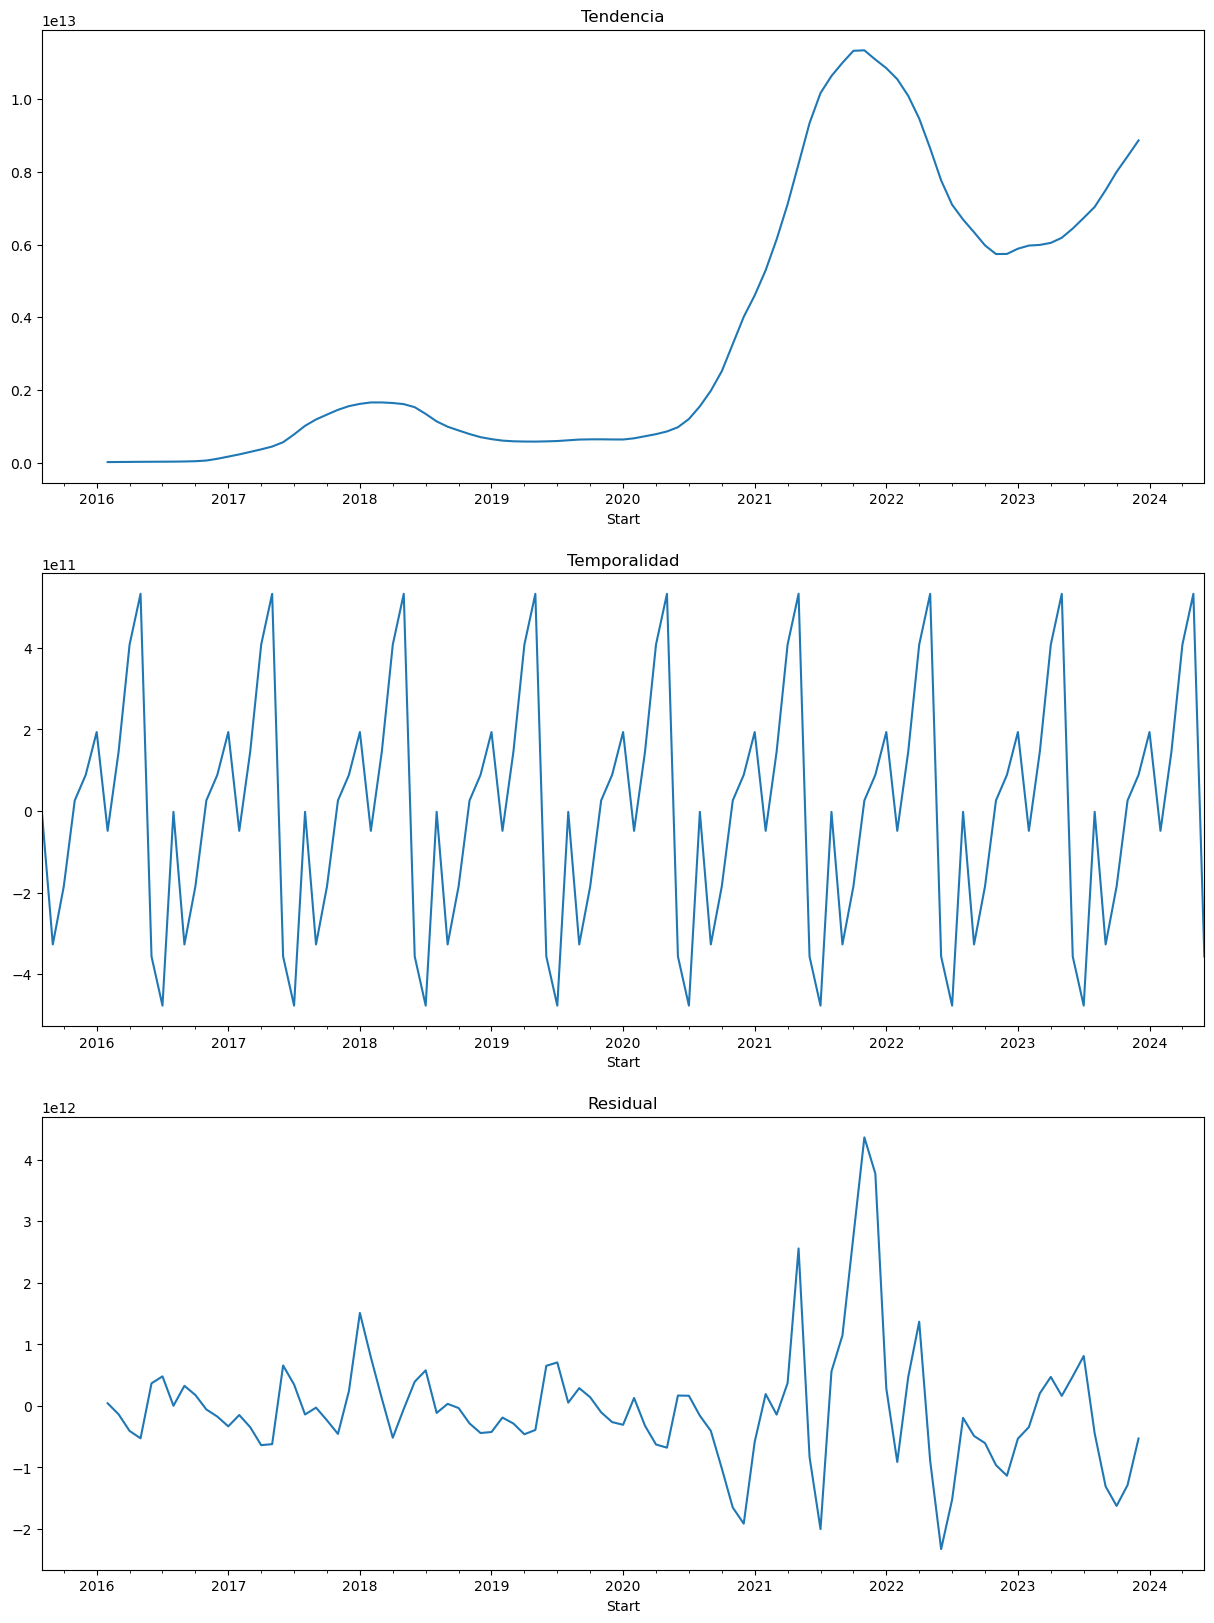

In [9]:
decomposed = seasonal_decompose(data_date_r_M)

plt.figure(figsize=(15,20))

plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Tendencia')
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Temporalidad')
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Residual')
plt.show()

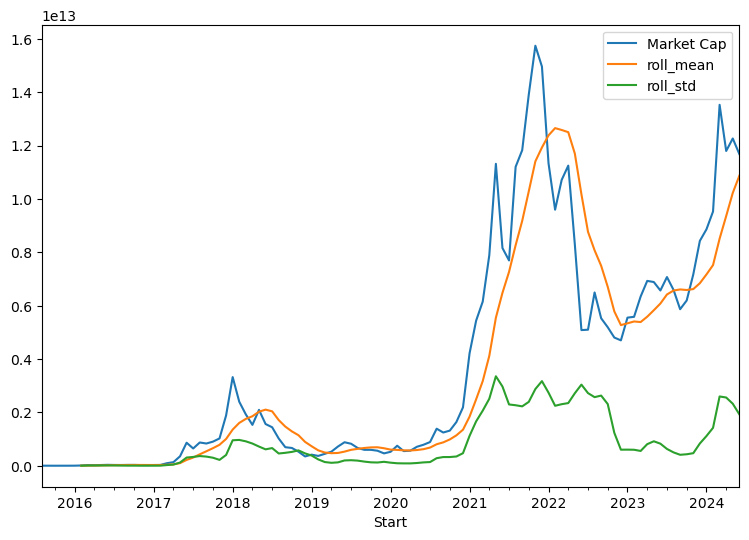

In [10]:
data_day = data_date_r_M
data_day['roll_mean'] = data_day['Market Cap'].rolling(7).mean()

data_day['roll_std'] = data_day['Market Cap'].rolling(7).std()

data_day.plot(figsize=(9,6))
plt.show()